Patrick BROCKMANN - LSCE (Climate and Environment Sciences Laboratory)

 * 2023/11/06 - updated
 * 2023/09/21 - updated
 * 2022/06/28 - updated
 * 2021/12/13 - initial revision

<img align="left" width="50%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png" >

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

### Corrections to do on the file itself OAICC_20231101.csv
 * 'The Kingdom of Saudi Arabia' --> 'Kingdom of Saudi Arabia'

In [2]:
df = pd.read_csv("https://oa-icc.ipsl.fr/checking/OAICC_20231101.csv")
df

,Reference,DOI,DOI_PANGAEA,Included/Not included,Reason for non inclusion,Country/Region,Year
0,"Adeleke, B., Robertson-Andersson, D., & Moodle...",doi:10.1016/j.heliyon.2020.e04744,NaN,Not included,< 2 carbonate chemistry parameters,South Africa,2020
1,"Ahnelt, H., Schade, F. M., & Wegner, M., 2016....",doi:10.1111/jfd.12417,NaN,Not included,< 2 carbonate chemistry parameters,EU-Austria,2016
2,"Ahrendt, S., Mobberley, J., Visscher, P., Koss...",doi:10.3390/min4010145,NaN,Not included,< 2 carbonate chemistry parameters,USA,2014
3,"Aires, T., Serebryakova, A., Viard, F., Serrão...",doi:10.7717/peerj.4377,NaN,Not included,< 2 carbonate chemistry parameters,EU-Portugal,2018
4,"Al-Awlaqi, N. A. N., Shazili, N. A. M., & Yuso...",doi:10.17576/mjas-2019-2306-10,NaN,Not included,< 2 carbonate chemistry parameters,Malaysia,2019
...,...,...,...,...,...,...,...
3660,"Zittier, Z. M. C., Hirse, T., & Pörtner, H.-O....",doi:10.1007/s00227-012-2073-8,10.1594/PANGAEA.821402,Included,NaN,EU-Germany,2013
3661,"Ziveri, P., Passaro, M., Incarbona, A., Milazz...",doi:10.1086/BBLv226n3p282,10.1594/PANGAEA.838830,Included,NaN,EU-Spain,2014
3662,"Zlatkin, R. L., & Heuer, R. M., 2019. Ocean ac...",doi:10.1098/rsos.191041,10.1594/PANGAEA.912287,Included,NaN,USA,2019
3663,"Zondervan, I., Rost, B., & Riebesell, U., 2002...",doi:10.1016/S0022-0981(02)00037-0,10.1594/PANGAEA.726883,Included,NaN,EU-Germany,2002


In [3]:
df['Included/Not included'].unique()

array(['Not included', 'Included'], dtype=object)

In [4]:
df[df['Included/Not included'] == 'Included'][0:100]

,Reference,DOI,DOI_PANGAEA,Included/Not included,Reason for non inclusion,Country/Region,Year
2111,"Ab Lah, R., Kelaher, B. P., Bucher, D., & Benk...",doi:10.1016/j.marenvres.2018.08.009,10.1594/PANGAEA.902088,Included,NaN,Malaysia,2018
2112,"Abarca-Ortega, A., Muñoz-Moya, E., Pacheco Ala...",doi:10.3389/fbioe.2021.813537,10.1594/PANGAEA.945534,Included,NaN,Chile,2022
2113,"Aberle, N., Schulz, K. G., Stuhr, A., Malzahn,...",doi:10.5194/bg-10-1471-2013,10.1594/PANGAEA.832403,Included,NaN,EU-Germany,2013
2114,"Agostini, S., Fujimura, H., Higuchi, T., Yuyam...",doi:10.1016/j.crvi.2013.07.003,10.1594/PANGAEA.835319,Included,NaN,Japan,2013
2115,"Agostini, S., Harvey, B. P., Milazzo, M., Wada...",doi:10.1111/gcb.15749,10.1594/PANGAEA.944056,Included,NaN,Japan,2021
...,...,...,...,...,...,...,...
2206,"Bergstrom, E., Silva, J., Martins, C., & Horta...",doi:10.1038/s41598-018-35670-3,10.1594/PANGAEA.914662,Included,NaN,Australia,2019
2207,"Bermúdez, R., Winder, M., Stuhr, A., Almén, A....",doi:10.5194/bg-13-6625-2016-supplement,10.1594/PANGAEA.873653,Included,NaN,EU-Germany,2016
2208,"Bernhard, J. M., Wit, J. C., Starczak, V. R., ...",doi:10.3389/fmars.2021.643339,10.1594/PANGAEA.932793,Included,NaN,USA,2021
2209,"Bi, R., Ismar, S., Sommer, U., & Zhao, M., 201...",doi:10.1002/lno.10429,10.1594/PANGAEA.883475,Included,NaN,China,2017


In [5]:
a = df[df['Included/Not included'] == 'Included'].groupby("Country/Region").size()
a.sort_values(inplace=True, ascending=False)
b = a[a >= 5]
b

Country/Region
USA                        327
EU-Germany                 243
Australia                  148
China                      148
EU-UK                      122
EU-France                   74
EU-Spain                    48
Japan                       47
EU-Portugal                 45
Canada                      40
EU-Norway                   32
EU-Sweden                   31
EU-Italy                    30
New Zealand                 22
Chile                       21
EU-Monaco                   19
EU-Belgium                  19
EU-The Netherlands          16
Israel                      12
China, Hong Kong            11
Republic of Korea           10
EU-Greece                    9
Brazil                       9
India                        7
EU-Finland                   6
China, Taiwan                6
Kingdom of Saudi Arabia      6
EU-UK (Bermuda)              6
dtype: int64

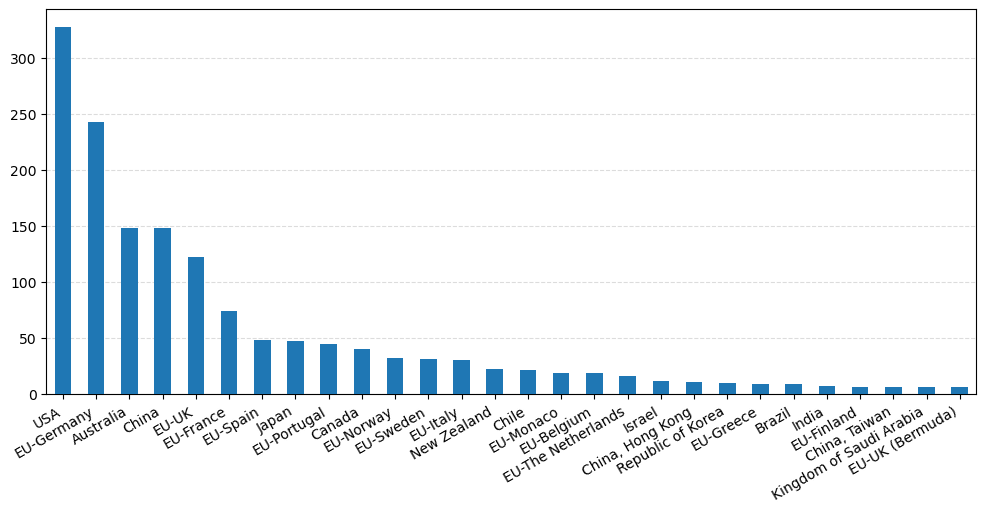

In [6]:
ax = b.plot.bar(zorder=3, figsize=[12,5], width=0.5, xlabel="")
ax.grid(axis='y', zorder=0, color='gainsboro', linestyle='--')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

In [7]:
x = "EU-France (New Caledonia)"
x = "China, xxxx"
x = "USA, Guam"
re.split('-|,|\(', x)[1].strip()

'Guam'

In [8]:
# Country/Region 2
# EU-xxxx as EU
# China, xxxx as China
# USA, xxxx as USA
df['Country/Region 2'] = df['Country/Region'].apply(lambda x: re.split('-|,', x)[0].strip())

# Country/Region 3
# EU-xxxx (yyyy) as xxxx
# EU-UK (Bermuda) as UK
# EU-France (New Caledonia) as France
# China, xxxx as xxxx
# USA, xxxx as xxxx
df['Country/Region 3'] = df['Country/Region'].apply(lambda x: re.split('-|,|\(', x)[1].strip() if str(x).startswith(("EU-", "China,", "USA,")) else x)

df

,Reference,DOI,DOI_PANGAEA,Included/Not included,Reason for non inclusion,Country/Region,Year,Country/Region 2,Country/Region 3
0,"Adeleke, B., Robertson-Andersson, D., & Moodle...",doi:10.1016/j.heliyon.2020.e04744,NaN,Not included,< 2 carbonate chemistry parameters,South Africa,2020,South Africa,South Africa
1,"Ahnelt, H., Schade, F. M., & Wegner, M., 2016....",doi:10.1111/jfd.12417,NaN,Not included,< 2 carbonate chemistry parameters,EU-Austria,2016,EU,Austria
2,"Ahrendt, S., Mobberley, J., Visscher, P., Koss...",doi:10.3390/min4010145,NaN,Not included,< 2 carbonate chemistry parameters,USA,2014,USA,USA
3,"Aires, T., Serebryakova, A., Viard, F., Serrão...",doi:10.7717/peerj.4377,NaN,Not included,< 2 carbonate chemistry parameters,EU-Portugal,2018,EU,Portugal
4,"Al-Awlaqi, N. A. N., Shazili, N. A. M., & Yuso...",doi:10.17576/mjas-2019-2306-10,NaN,Not included,< 2 carbonate chemistry parameters,Malaysia,2019,Malaysia,Malaysia
...,...,...,...,...,...,...,...,...,...
3660,"Zittier, Z. M. C., Hirse, T., & Pörtner, H.-O....",doi:10.1007/s00227-012-2073-8,10.1594/PANGAEA.821402,Included,NaN,EU-Germany,2013,EU,Germany
3661,"Ziveri, P., Passaro, M., Incarbona, A., Milazz...",doi:10.1086/BBLv226n3p282,10.1594/PANGAEA.838830,Included,NaN,EU-Spain,2014,EU,Spain
3662,"Zlatkin, R. L., & Heuer, R. M., 2019. Ocean ac...",doi:10.1098/rsos.191041,10.1594/PANGAEA.912287,Included,NaN,USA,2019,USA,USA
3663,"Zondervan, I., Rost, B., & Riebesell, U., 2002...",doi:10.1016/S0022-0981(02)00037-0,10.1594/PANGAEA.726883,Included,NaN,EU-Germany,2002,EU,Germany


In [9]:
df[df['Country/Region'].isna()]

,Reference,DOI,DOI_PANGAEA,Included/Not included,Reason for non inclusion,Country/Region,Year,Country/Region 2,Country/Region 3


In [10]:
len(df)

3665

In [11]:
df[df['Country/Region'].str.startswith("China,")]

,Reference,DOI,DOI_PANGAEA,Included/Not included,Reason for non inclusion,Country/Region,Year,Country/Region 2,Country/Region 3
73,"Chan, B. K., Wang, T. W., Chen, P. C., Lin, C....",doi:10.1371/journal.pone.0148675,NaN,Not included,< 2 carbonate chemistry parameters,"China, Taiwan",2016,China,Taiwan
222,"Kang, J., Nagelkerken, I., Rummer, J. L., Rodo...",doi:10.1111/gcb.16119,NaN,Not included,< 2 carbonate chemistry parameters,"China, Hong Kong",2022,China,Hong Kong
255,"Lee, M. C., Libatique, M. J. H., Yeh, H. Y., &...",doi:10.1007/s00128-022-03498-3,NaN,Not included,< 2 carbonate chemistry parameters,"China, Taiwan",2022,China,Taiwan
824,"Dang, X., Lim, Y. K., Li, Y., Roberts, S. B., ...",doi:10.1111/mec.16751,NaN,Not included,No answer from authors,"China, Hong Kong",2023,China,Hong Kong
1152,"Hsieh, H.-H., Weerathunga, V., Weerakkody, W. ...",doi:10.1038/s41598-021-00612-z,NaN,Not included,No answer from authors,"China, Taiwan",2021,China,Taiwan
1158,"Hu, M. Y., Guh, Y.-J., Stumpp, M., Lee, J.-R.,...",doi:10.1186/s12983-014-0055-z,NaN,Not included,No answer from authors,"China, Taiwan",2014,China,Taiwan
1159,"Hu, M. Y., Lee, J. R., Lin, L. Y., Shih, T. H....",doi:10.1186/1742-9994-10-51,NaN,Not included,No answer from authors,"China, Taiwan",2013,China,Taiwan
1312,"Lane, A. C., Mukherjee, J., Chan, V. B. S., & ...",doi:10.1007/s00227-012-2056-9,NaN,Not included,No answer from authors,"China, Hong Kong",2013,China,Hong Kong
1388,"Liu, P.-J., Ang, S.-J., Mayfield, A. B., & Lin...",doi:10.1016/j.scitotenv.2019.134464,NaN,Not included,No answer from authors,"China, Taiwan",2020,China,Taiwan
1395,"Lo, H. K. A., Chua, V. A., & Chan, K. Y. K., 2...",doi:10.1016/j.scitotenv.2021.149709,NaN,Not included,No answer from authors,"China, Hong Kong",2021,China,Hong Kong


In [12]:
df[df['Country/Region'].str.startswith("USA,")]

,Reference,DOI,DOI_PANGAEA,Included/Not included,Reason for non inclusion,Country/Region,Year,Country/Region 2,Country/Region 3
640,"Bell, T., Manullang, C., Kumagai, N. H., Sakai...",doi:10.3755/galaxea.g2020_s2o,NaN,Not included,No answer from authors,"USA, Guam",2022,USA,Guam
641,"Bell, T., Manullang, C., Sakai, K., Suzuki, A....",doi:10.3755/galaxea.g2020_s1n,NaN,Not included,No answer from authors,"USA, Guam",2021,USA,Guam


In [13]:
# contains '-' of ','
df[df['Country/Region'].str.contains(",|-")]

,Reference,DOI,DOI_PANGAEA,Included/Not included,Reason for non inclusion,Country/Region,Year,Country/Region 2,Country/Region 3
1,"Ahnelt, H., Schade, F. M., & Wegner, M., 2016....",doi:10.1111/jfd.12417,NaN,Not included,< 2 carbonate chemistry parameters,EU-Austria,2016,EU,Austria
3,"Aires, T., Serebryakova, A., Viard, F., Serrão...",doi:10.7717/peerj.4377,NaN,Not included,< 2 carbonate chemistry parameters,EU-Portugal,2018,EU,Portugal
5,"Al-Janabi, B., Kruse, I., Graiff, A., Winde, V...",doi:10.1371/journal.pone.0152948,NaN,Not included,< 2 carbonate chemistry parameters,EU-Germany,2016,EU,Germany
6,"Alenius, B., & Munguia, P., 2012. Effects of p...",doi:10.1080/10236244.2012.727235,NaN,Not included,< 2 carbonate chemistry parameters,EU-Sweden,2012,EU,Sweden
8,"Allison, N., Cole, C., Hintz, C., Hintz, K., &...",doi:10.1016/j.palaeo.2018.06.015,NaN,Not included,< 2 carbonate chemistry parameters,EU-UK,2018,EU,UK
...,...,...,...,...,...,...,...,...,...
3659,"Zittier, Z. M. C., Bock, C., Lannig, G., & Pör...",doi:10.1016/j.jembe.2015.08.001,10.1594/PANGAEA.867517,Included,NaN,EU-Germany,2015,EU,Germany
3660,"Zittier, Z. M. C., Hirse, T., & Pörtner, H.-O....",doi:10.1007/s00227-012-2073-8,10.1594/PANGAEA.821402,Included,NaN,EU-Germany,2013,EU,Germany
3661,"Ziveri, P., Passaro, M., Incarbona, A., Milazz...",doi:10.1086/BBLv226n3p282,10.1594/PANGAEA.838830,Included,NaN,EU-Spain,2014,EU,Spain
3663,"Zondervan, I., Rost, B., & Riebesell, U., 2002...",doi:10.1016/S0022-0981(02)00037-0,10.1594/PANGAEA.726883,Included,NaN,EU-Germany,2002,EU,Germany


In [14]:
a = df[df['Included/Not included'] == 'Included'].groupby("Country/Region 2").size()
a.sort_values(inplace=True, ascending=False)
b = a[a >= 5]
b

Country/Region 2
EU                         717
USA                        327
China                      165
Australia                  148
Japan                       47
Canada                      40
New Zealand                 22
Chile                       21
Israel                      12
Republic of Korea           10
Brazil                       9
India                        7
Kingdom of Saudi Arabia      6
dtype: int64

In [15]:
b.rename(index={'EU': 'European countries'}, inplace=True)

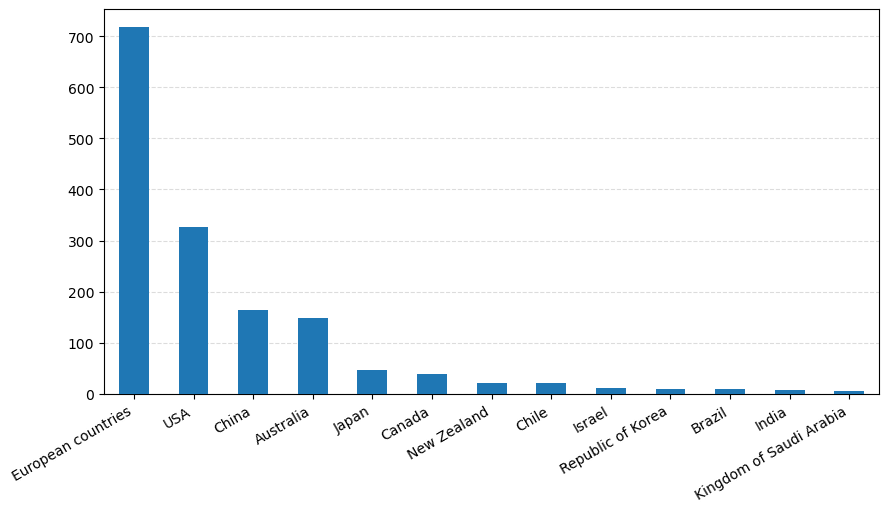

In [16]:
ax = b.plot.bar(zorder=3, figsize=[10,5], width=0.5, xlabel="")
ax.grid(axis='y', zorder=0, color='gainsboro', linestyle='--')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

In [17]:
a = df[df['Included/Not included'] == 'Included'].groupby("Country/Region 3").size()
a.sort_values(inplace=True, ascending=False)
b = a[a >= 5]

b.rename(index={'UK': 'United Kingdom'}, inplace=True)
b

Country/Region 3
USA                        327
Germany                    243
China                      148
Australia                  148
United Kingdom             128
France                      76
Spain                       48
Japan                       47
Portugal                    45
Canada                      40
Norway                      32
Sweden                      31
Italy                       30
New Zealand                 22
Chile                       21
Belgium                     19
Monaco                      19
The Netherlands             16
Israel                      12
Hong Kong                   11
Republic of Korea           10
Greece                       9
Brazil                       9
India                        7
Kingdom of Saudi Arabia      6
Taiwan                       6
Finland                      6
dtype: int64

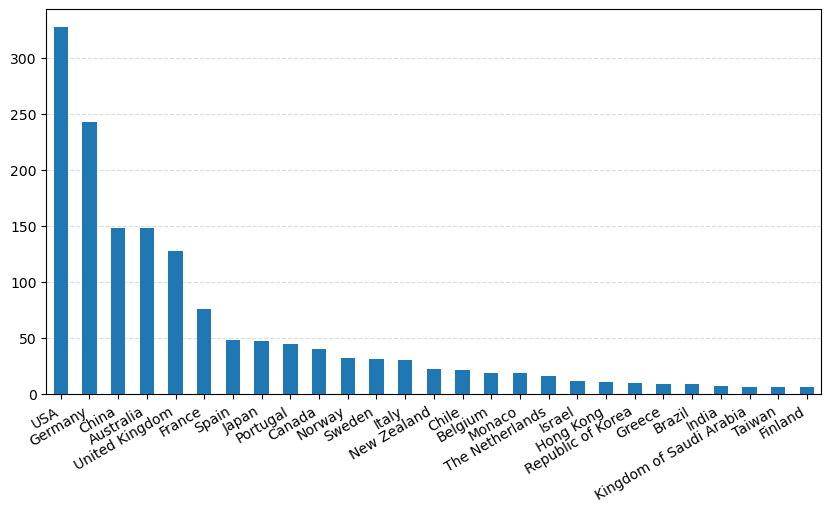

In [18]:
ax = b.plot.bar(zorder=3, figsize=[10,5], width=0.5, xlabel="")
ax.grid(axis='y', zorder=0, color='gainsboro', linestyle='--')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

### Bellow maps

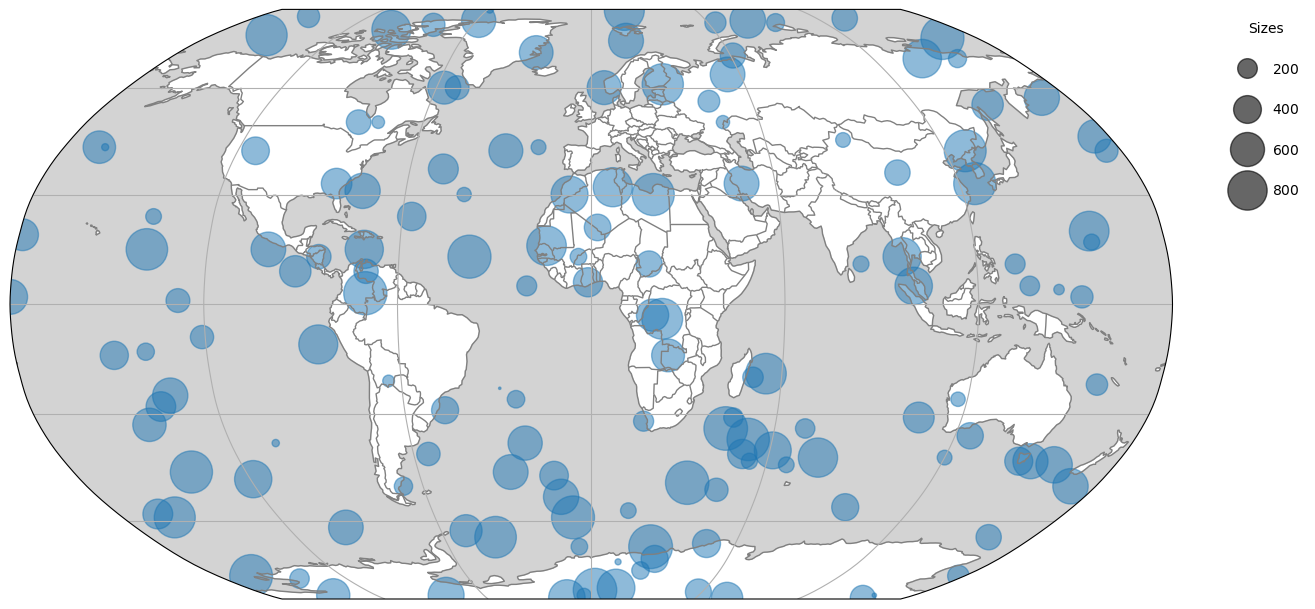

In [26]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import random

x = [random.randint(-180, 180) for p in range(0, 149)]
y = [random.randint(-90, 90) for p in range(0, 149)]
s = [random.randint(1, 1000) for p in range(0, 149)]

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.BORDERS, edgecolor="gray")
ax.add_feature(cfeature.OCEAN, color="lightgray")
ax.gridlines()

scatter = plt.scatter(x, y, s=s, transform=ccrs.PlateCarree(), alpha=0.5)

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, num=5)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes", 
                    bbox_to_anchor=(1.12, 1), frameon=False, labelspacing=1.9)

plt.show()

#### Different ways to locate from a standard name
- geopy
- pycountry

In [27]:
# https://towardsdatascience.com/things-to-do-with-latitude-longitude-data-using-geopy-python-1d356ed1ae30
from geopy.geocoders import Nominatim
geocoder = Nominatim(user_agent = 'your_app_name')

In [28]:
# pycountry provides ISO 3166 codes
import pycountry
pycountry.countries.get(name='Taiwan, Province of China').alpha_3
pycountry.countries.get(name='Bermuda').alpha_3
pycountry.countries.get(name='Bahamas').alpha_3

'BHS'

### Included papers

In [29]:
def myLocate(text):
    location = geocoder.geocode({'country': text})
    if location == None:
        location = geocoder.geocode({'city': text})
    return location

0 UK United Kingdom
1 Bermuda Bermuda
2 Brunei Darussalam Brunei
3 The Bahamas The Bahamas
4 Estonia Eesti
5 Malaysia Malaysia
6 Kingdom of Saudi Arabia السعودية
7 China, Hong Kong 3, 港九-中國混凝土有限公司 Hong Kong - China Concrete Company Limited, 屏山 Ping Shan, 唐人新村 Tong Yan San Tsuen, 元朗區 Yuen Long District, 新界 New Territories, 香港 Hong Kong, 中国
8 Korea 대한민국
9 Taiwan 臺灣
10 Israël ישראל
11 China 中国
12 France, Nouméa Nouméa, Province Sud, Nouvelle-Calédonie, 98800, France
13 Saudi Arabia السعودية
14 Bangladesh বাংলাদেশ
15 The Netherlands Nederland


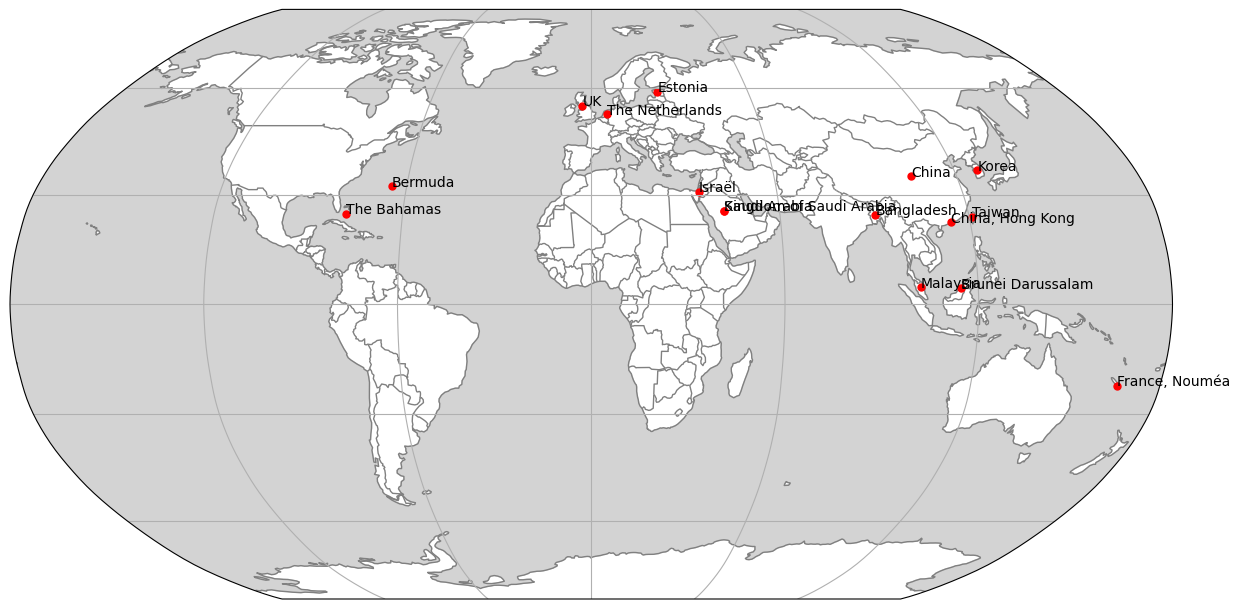

In [30]:
list1 = [
    "UK",
    "Bermuda",
    "Brunei Darussalam",
    "The Bahamas",
    "Estonia",
    "Malaysia",
    "Kingdom of Saudi Arabia",
    "China, Hong Kong",
    "Korea",
    "Taiwan",
    "Israël",
    "China",
    "France, Nouméa",
    "Saudi Arabia",
    "Bangladesh",
    "The Netherlands"
]

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.BORDERS, edgecolor="gray")
ax.add_feature(cfeature.OCEAN, color="lightgray")
ax.gridlines()

for n,text in enumerate(list1):
    location = myLocate(text)
    print(n, text, location)
    plt.plot(location.longitude, location.latitude, transform=ccrs.PlateCarree(),
                  color='r', marker='.', markersize=10)
    plt.text(location.longitude, location.latitude, text, transform=ccrs.PlateCarree(), color='black')

plt.show()

In [31]:
a1 = df[df['Included/Not included'] == 'Included'].groupby("Country/Region 2").size()
a1.sort_values(inplace=True, ascending=False)
#b1 = a1[a1 >= 5]
b1 = a1
b1

Country/Region 2
EU                         717
USA                        327
Australia                  148
China                      148
Japan                       47
Canada                      40
New Zealand                 22
Chile                       21
Israel                      12
China, Hong Kong            11
Republic of Korea           10
Brazil                       9
India                        7
Kingdom of Saudi Arabia      6
China, Taiwan                6
Mexico                       4
Philippines                  4
South Africa                 4
Argentina                    2
Malaysia                     2
Colombia                     2
Panama                       2
Cuba                         1
Kuwait                       1
Angola                       1
dtype: int64

In [32]:
b1.index

Index(['EU', 'USA', 'Australia', 'China', 'Japan', 'Canada', 'New Zealand',
       'Chile', 'Israel', 'China, Hong Kong', 'Republic of Korea', 'Brazil',
       'India', 'Kingdom of Saudi Arabia', 'China, Taiwan', 'Mexico',
       'Philippines', 'South Africa', 'Argentina', 'Malaysia', 'Colombia',
       'Panama', 'Cuba', 'Kuwait', 'Angola'],
      dtype='object', name='Country/Region 2')

In [33]:
b1

Country/Region 2
EU                         717
USA                        327
Australia                  148
China                      148
Japan                       47
Canada                      40
New Zealand                 22
Chile                       21
Israel                      12
China, Hong Kong            11
Republic of Korea           10
Brazil                       9
India                        7
Kingdom of Saudi Arabia      6
China, Taiwan                6
Mexico                       4
Philippines                  4
South Africa                 4
Argentina                    2
Malaysia                     2
Colombia                     2
Panama                       2
Cuba                         1
Kuwait                       1
Angola                       1
dtype: int64

In [35]:
# Corrections needed to locate correctly
b1.rename(index={'China, Taiwan': 'Taiwan'}, inplace=True)
b1.rename(index={'China, Hong Kong': 'Hong Kong'}, inplace=True)

b1.index

Index(['EU', 'USA', 'Australia', 'China', 'Japan', 'Canada', 'New Zealand',
       'Chile', 'Israel', 'Hong Kong', 'Republic of Korea', 'Brazil', 'India',
       'Kingdom of Saudi Arabia', 'Taiwan', 'Mexico', 'Philippines',
       'South Africa', 'Argentina', 'Malaysia', 'Colombia', 'Panama', 'Cuba',
       'Kuwait', 'Angola'],
      dtype='object', name='Country/Region 2')

In [36]:
def myLocate(text):
    location = geocoder.geocode({'country': text})
    if location == None:
        location = geocoder.geocode({'city': text})
    return location

b1_geocode = b1.index.map(lambda x: myLocate(x))

In [37]:
b1_geocode

Index([('Eu, Dieppe, Seine-Maritime, Normandie, France métropolitaine, 76260, France', (50.0491699, 1.4175744)),
                                                                   ('United States', (39.7837304, -100.445882)),
                                                                          ('Australia', (-24.7761086, 134.755)),
                                                                                ('中国', (35.000074, 104.999927)),
                                                                              ('日本', (36.5748441, 139.2394179)),
                                                                          ('Canada', (61.0666922, -107.991707)),
                                                         ('New Zealand / Aotearoa', (-41.5000831, 172.8344077)),
                                                                          ('Chile', (-31.7613365, -71.3187697)),
                                                                            ('ישראל', (30.812424

In [38]:
# EU is located wrongly but it is ok 

In [39]:
b1_lon = [g.longitude for g in b1_geocode]
b1_lat = [g.latitude for g in b1_geocode]

In [40]:
b1_lon[0], b1_lat[0], b1[0]

(1.4175744, 50.0491699, 717)

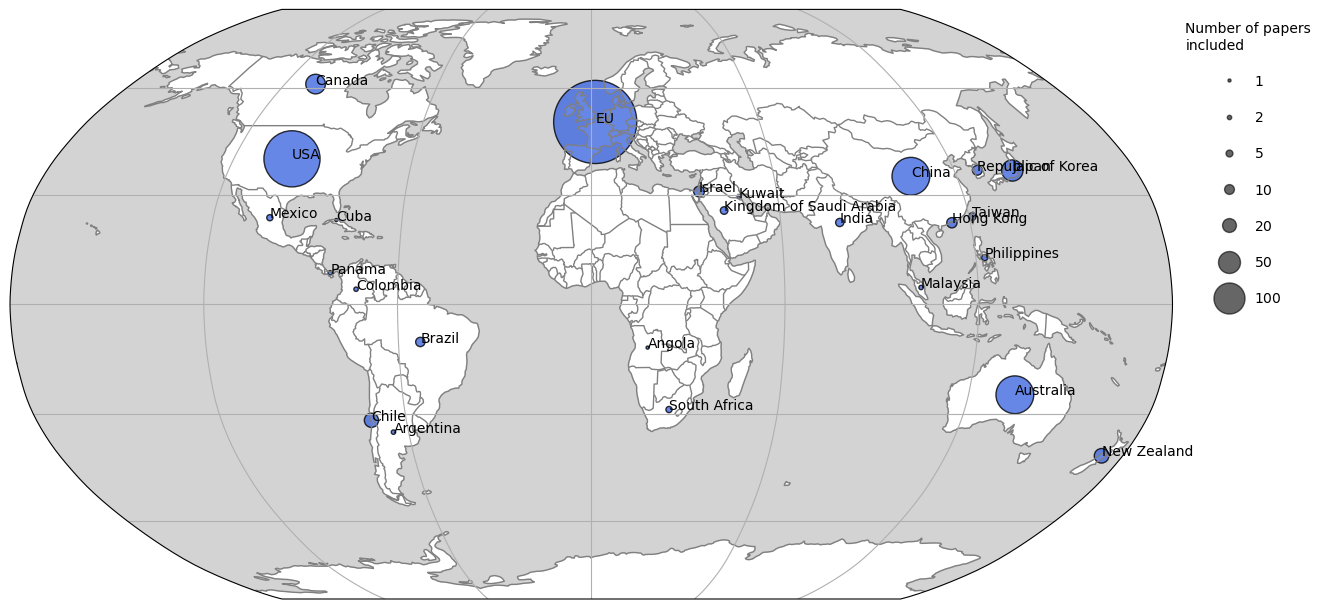

In [41]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.BORDERS, edgecolor="gray")
ax.add_feature(cfeature.OCEAN, color="lightgray")
ax.gridlines()

scaleFactor = 5
scatter = plt.scatter(b1_lon, b1_lat, b1*scaleFactor, transform=ccrs.PlateCarree(), 
                      alpha=0.8, color='royalblue', edgecolor='black')

for n,b1_item in enumerate(b1):
    plt.text(b1_lon[n], b1_lat[n], b1.index[n], transform=ccrs.PlateCarree(), color='black')

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, num=[1,2,5,10,20,50,100],
                                         func=lambda x: x/scaleFactor)
legend2 = ax.legend(handles, labels, loc="upper right", title="Number of papers\nincluded", 
                    bbox_to_anchor=(1.13, 1), frameon=False, labelspacing=1.6)

plt.show()

In [42]:
a1 = df[(df['Country/Region'].str.startswith("EU-")) & (df['Included/Not included'] == 'Included')].groupby("Country/Region 3").size()
a1.sort_values(inplace=True, ascending=False)
#b1 = a1[a1 >= 5]
b1 = a1
b1

Country/Region 3
Germany            243
UK                 128
France              76
Spain               48
Portugal            45
Norway              32
Sweden              31
Italy               30
Belgium             19
Monaco              19
The Netherlands     16
Greece               9
Finland              6
Denmark              4
Estonia              3
Turkey               3
Czech Republic       2
Iceland              1
Poland               1
Switzerland          1
dtype: int64

In [44]:
b1_geocode = b1.index.map(lambda x: myLocate(x))
b1_geocode

Index([                  ('Deutschland', (51.1638175, 10.4478313)),
                      ('United Kingdom', (54.7023545, -3.2765753)),
                                ('France', (46.603354, 1.8883335)),
                              ('España', (39.3260685, -4.8379791)),
                            ('Portugal', (39.6621648, -8.1353519)),
                                ('Norge', (61.1529386, 8.7876653)),
                             ('Sverige', (59.6749712, 14.5208584)),
                               ('Italia', (42.6384261, 12.674297)),
          ('België / Belgique / Belgien', (50.6402809, 4.6667145)),
                               ('Monaco', (43.7323492, 7.4276832)),
                   ('Nederland', (52.24764975, 5.541246849406163)),
                               ('Ελλάς', (38.9953683, 21.9877132)),
                     ('Suomi / Finland', (63.2467777, 25.9209164)),
                              ('Danmark', (55.670249, 10.3333283)),
                               ('Eesti', (58.752

In [45]:
b1_lon = [g.longitude for g in b1_geocode]
b1_lat = [g.latitude for g in b1_geocode]

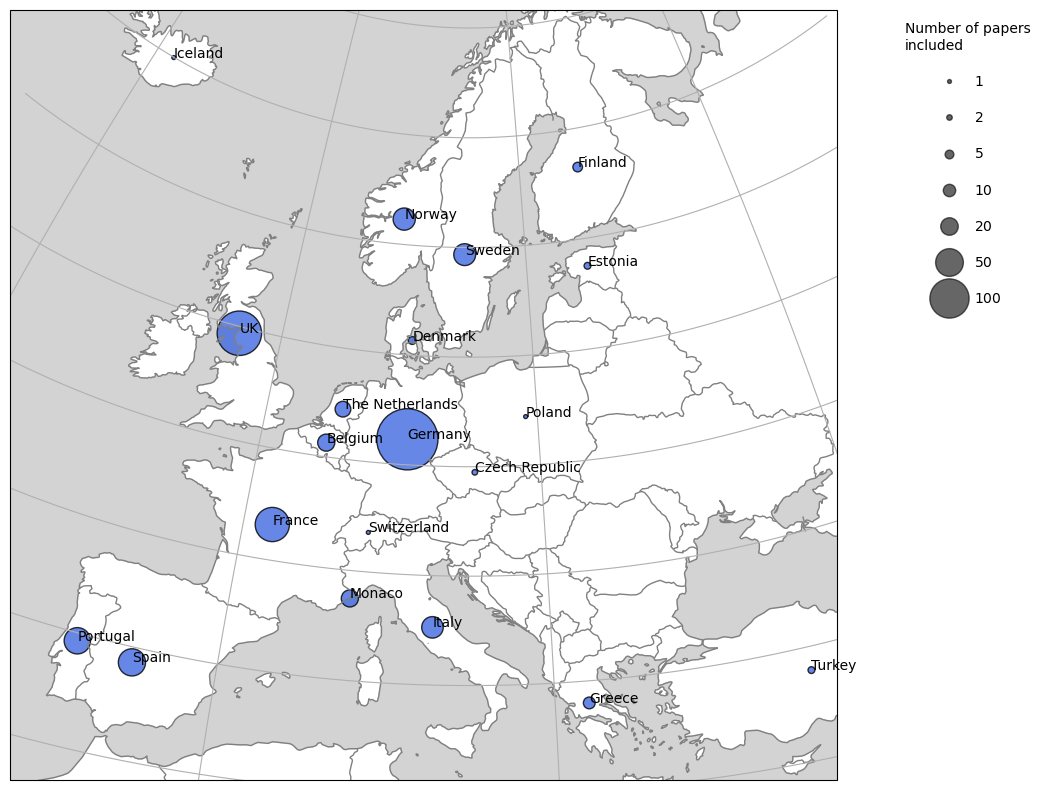

In [46]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(1,1,1, projection=ccrs.TransverseMercator(central_longitude=15, approx=True))

left = -10
right = 35
bottom = 34
top = 69
ax.set_extent([left, right, bottom, top])   # (left, right, bottom, top)

ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.BORDERS, edgecolor="gray")
ax.add_feature(cfeature.OCEAN, color="lightgray")
ax.gridlines()

scaleFactor = 8
scatter = plt.scatter(b1_lon, b1_lat, b1*scaleFactor, transform=ccrs.PlateCarree(), 
                      alpha=0.8, color='royalblue', edgecolor='black')

for n,b1_item in enumerate(b1):
    plt.text(b1_lon[n], b1_lat[n], b1.index[n], transform=ccrs.PlateCarree(), color='black', clip_on=True)

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, num=[1,2,5,10,20,50,100],
                                         func=lambda x: x/scaleFactor)
legend2 = ax.legend(handles, labels, loc="upper right", title="Number of papers\nincluded", 
                    bbox_to_anchor=(1.25, 1), frameon=False, labelspacing=1.6)

plt.show()

### Not included papers

In [47]:
df[df['Reason for non inclusion'] == 'No answer from authors']

,Reference,DOI,DOI_PANGAEA,Included/Not included,Reason for non inclusion,Country/Region,Year,Country/Region 2,Country/Region 3
573,"Achlatis, M., van der Zande, R. M., Schönberg,...",doi:10.1038/s41598-017-10947-1,NaN,Not included,No answer from authors,Australia,2017,Australia,Australia
574,"Agnalt, A.-L., Grefsrud, E. S., Farestveit, E....",doi:10.5194/bg-10-7883-2013,NaN,Not included,No answer from authors,EU-Norway,2013,EU,Norway
575,"Aguayo, P., Campos, V. L., Henríquez, C., Oliv...",doi:10.3390/microorganisms8121924,NaN,Not included,No answer from authors,Chile,2020,Chile,Chile
576,"Albert, G., Hepburn, C. D., Pajusalu, L., Paal...",doi:10.1007/s10811-019-01953-z,NaN,Not included,No answer from authors,EU-Estonia,2019,EU,Estonia
577,"Albright, R., Bland, C., Gillette, P., Serafy,...",doi:10.1016/j.jembe.2012.05.017,NaN,Not included,No answer from authors,USA,2012,USA,USA
...,...,...,...,...,...,...,...,...,...
2090,"Zhu, X., Liao, H., Yang, Z., Peng, C., Lu, W.,...",doi:10.1016/j.fsi.2020.01.036,NaN,Not included,No answer from authors,China,2020,China,China
2091,"Zhu, Z., Qu, P., Gale, J., Fu, F., & Hutchins,...",doi:10.5194/bg-14-5281-2017,NaN,Not included,No answer from authors,USA,2017,USA,USA
2092,"Zittier, Z. M. C., Bock, C., Sukhotin, A. A., ...",doi:10.1007/s00300-018-2362-x,NaN,Not included,No answer from authors,EU-Germany,2018,EU,Germany
2093,"Ziveri, P., Thoms, S., Probert, I., Geisen, M....",doi:10.5194/bg-9-1025-2012,NaN,Not included,No answer from authors,EU-Spain,2012,EU,Spain


In [48]:
a2 = df[df['Reason for non inclusion'] == 'No answer from authors'].groupby("Country/Region 2").size()
a2.sort_values(inplace=True, ascending=False)
#b2 = a2[a2 >= 5]
b2 = a2
b2

Country/Region 2
EU                         477
USA                        339
Australia                  219
China                      198
Chile                       46
Japan                       37
New Zealand                 34
Brazil                      28
Canada                      27
India                       24
Republic of Korea           24
Israel                      12
Indonesia                   10
China, Hong Kong             7
China, Taiwan                7
Egypt                        4
Malaysia                     4
South Africa                 3
Mexico                       3
Philippines                  3
Thailand                     2
Argentina                    2
Kuwait                       2
Kingdom of Saudi Arabia      2
USA, Guam                    2
Panama                       1
Peru                         1
Namibia                      1
Brunei Darussalam            1
The Bahamas                  1
Bangladesh                   1
dtype: int64

In [49]:
# Corrections needed to locate correctly
b2.rename(index={'USA, Guam': 'Guam'}, inplace=True)
b2.rename(index={'China, Hong Kong': 'Hong Kong'}, inplace=True)
b2.rename(index={'China, Taiwan': 'Taiwan'}, inplace=True)

b2.index

Index(['EU', 'USA', 'Australia', 'China', 'Chile', 'Japan', 'New Zealand',
       'Brazil', 'Canada', 'India', 'Republic of Korea', 'Israel', 'Indonesia',
       'Hong Kong', 'Taiwan', 'Egypt', 'Malaysia', 'South Africa', 'Mexico',
       'Philippines', 'Thailand', 'Argentina', 'Kuwait',
       'Kingdom of Saudi Arabia', 'Guam', 'Panama', 'Peru', 'Namibia',
       'Brunei Darussalam', 'The Bahamas', 'Bangladesh'],
      dtype='object', name='Country/Region 2')

In [41]:
b2_geocode = b2.index.map(lambda x: myLocate(x))
b2_geocode

Index([                                                           ('United States', (39.7837304, -100.445882)),
                                                                         ('Australia', (-24.7761086, 134.755)),
                                                                               ('中国', (35.000074, 104.999927)),
                                                                  ('United Kingdom', (54.7023545, -3.2765753)),
                                                                     ('Deutschland', (51.1638175, 10.4478313)),
                                                                        ('Portugal', (39.6621648, -8.1353519)),
                                                                          ('España', (39.3260685, -4.8379791)),
                                                                           ('Italia', (42.6384261, 12.674297)),
                                                                         ('Chile', (-31.7613365, -71.318

In [42]:
b2_lon = [g.longitude for g in b2_geocode]
b2_lat = [g.latitude for g in b2_geocode]

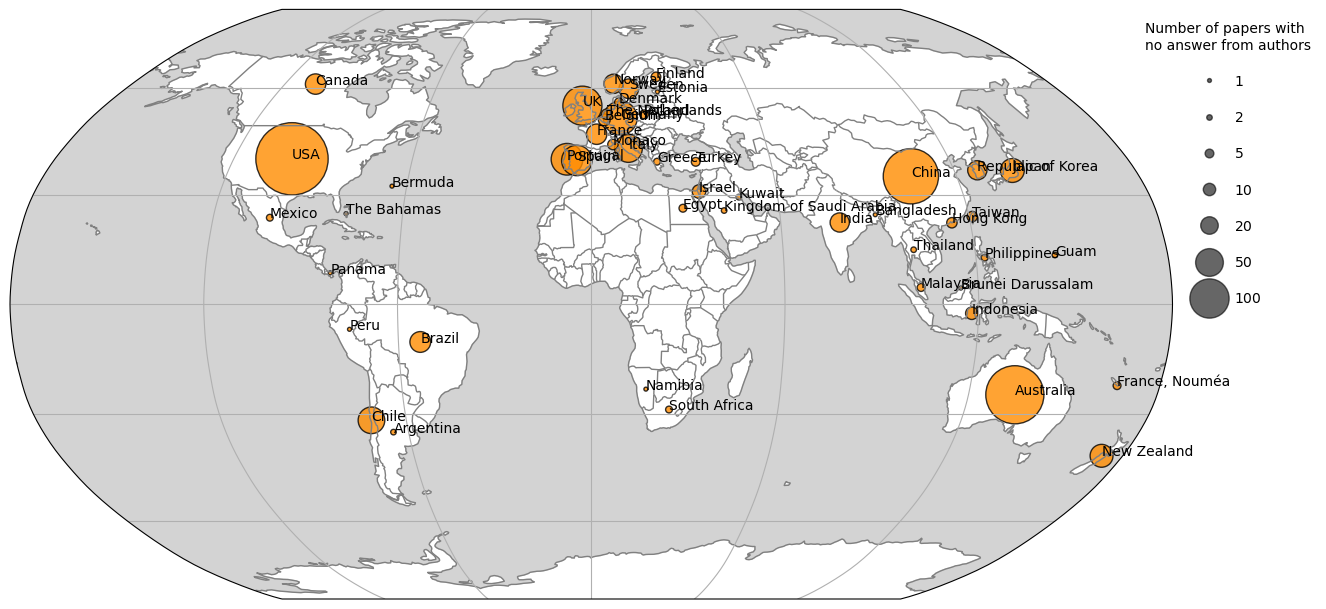

In [43]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="gray")
ax.add_feature(cfeature.BORDERS, edgecolor="gray")
ax.add_feature(cfeature.OCEAN, color="lightgray")
ax.gridlines()

scaleFactor = 8
scatter = plt.scatter(b2_lon, b2_lat, b2*scaleFactor, transform=ccrs.PlateCarree(), 
                      alpha=0.8, color='darkorange', edgecolor='black')

for n,b2_item in enumerate(b2):
    plt.text(b2_lon[n], b2_lat[n], b2.index[n], transform=ccrs.PlateCarree(), color='black')

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, num=[1,2,5,10,20,50,100],
                                         func=lambda x: x/scaleFactor)

legend2 = ax.legend(handles, labels, loc="upper right", title="Number of papers with\nno answer from authors", 
                    bbox_to_anchor=(1.13, 1), frameon=False, labelspacing=1.6)

plt.show()

In [44]:
b2

Country/Region 3
USA                        339
Australia                  219
China                      198
UK                          99
Germany                     74
Portugal                    65
Spain                       60
Italy                       50
Chile                       46
Japan                       37
New Zealand                 34
Brazil                      28
Canada                      27
France                      27
Sweden                      25
Norway                      24
India                       24
Republic of Korea           24
Israel                      12
Indonesia                   10
Belgium                      9
Monaco                       7
Hong Kong                    7
The Netherlands              7
Taiwan                       7
Finland                      6
Turkey                       5
Poland                       5
Denmark                      5
France, Nouméa               4
Malaysia                     4
Egypt                 